# Aktivierungsfunktionen
Deep Learning - KI29  
Deggendorf Institute of Technology  
Prof. Dr. Florian Wahl

In [1]:
import nnfs
import numpy as np

from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

Bevor es weiter geht sollten wir 2 Dinge klären:
1. Berechnung des Outputs eines Layers formalisieren und in eine Klasse kapseln.
2. Generierung von Testdaten.

## Forward pass berechnen
Die bisherige Berechnung nennt man den Forward Pass, da diese im Inference Schritt durchgeführt wird.
Im nächsten Schritt soll eine Layer Klasse erstellt werden. Diese initialisiert die Neuronen und berechnet den Output je Neuron.

In [8]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [3]:
0.01 * np.random.randn(4, 3)

array([[-0.00110971,  0.00951495, -0.01062047],
       [ 0.00090805, -0.0002967 , -0.00221207],
       [ 0.00868286,  0.01812075,  0.02034546],
       [ 0.0058883 , -0.0230163 ,  0.0070905 ]])

In [7]:
np.zeros((5, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

## Testdaten generieren
Nun benötigen wir noch Testdaten. Diese können mittels der Bibliothek nnfs generiert werden.

In [9]:
nnfs.init()
X, y = spiral_data(samples=100, classes=3)

In [11]:
X.shape

(300, 2)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

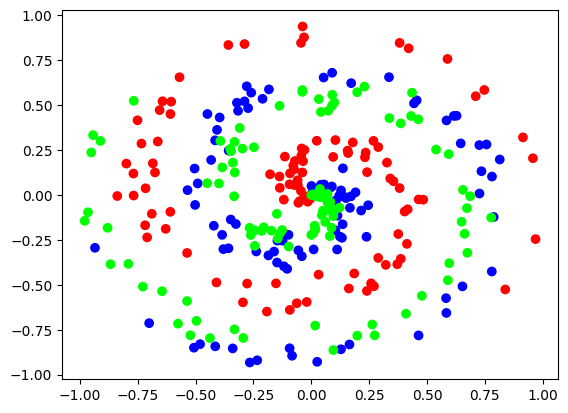

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, X, y, cv=cv).mean()

np.float64(0.7633333333333333)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

dt = DecisionTreeClassifier(max_depth=8)

cv = KFold(n_splits=5, shuffle=True)
cross_val_score(dt, X, y, cv=cv).mean()

np.float64(0.6266666666666667)

In [26]:
dense1 = Layer_Dense(2, 3)

dense1.forward(X)

dense1.output



array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.56323964e-04, -6.16644829e-05,  2.89113154e-06],
       [-2.02248208e-04,  1.60663949e-05,  9.96342933e-05],
       [ 1.05374820e-04,  3.82086640e-04,  3.38739366e-04],
       [ 7.48371822e-05,  4.63195349e-04,  4.32504981e-04],
       [-9.10504197e-04, -5.36039588e-04, -1.60124808e-04],
       [-1.84955425e-04,  4.58556897e-04,  5.35198953e-04],
       [-7.75881053e-04, -2.00923278e-05,  3.00457265e-04],
       [-7.21394026e-04,  1.58615308e-04,  4.56741633e-04],
       [-2.20037968e-04,  7.36853923e-04,  8.28128133e-04],
       [-3.06313363e-04,  7.65940058e-04,  8.92873795e-04],
       [ 1.19749224e-03,  1.85713684e-03,  1.36330456e-03],
       [ 8.00090085e-04,  1.76856795e-03,  1.43888080e-03],
       [ 3.33590375e-04,  1.57023699e-03,  1.43318868e-03],
       [ 1.04303344e-03,  2.12606648e-03,  1.69618253e-03],
       [ 1.23937440e-03,  2.34431424e-03,  1.83341897e-03],
       [ 2.79087666e-03,  2.87786243e-03

## Aktivierungsfunktionen
Im Folgdenden wollen wir pro Aktivierungsfunktion eine Klasse beschreiben. Dies bedeutet, dass wir am Ende eine Schicht immer aus Dense Layer + Aktivierungsfunktion beschreiben.

In [27]:
class Activation_Linear:
    def forward(inputs):
        self.output = inputs

In [28]:
my_inputs = [1, -3, 4, 6, -5, -3]

my_outputs = []

for i in my_inputs:
    if i > 0:
        my_outputs.append(1)
    else:
        my_outputs.append(0)
        
print(my_outputs)

[1, 0, 1, 1, 0, 0]


In [31]:
np.heaviside(my_inputs, 1)

class Activation_Step:
    def forward(self, inputs):
        self.output = np.heaviside(inputs, 1)

In [33]:
class Activation_Sigmoid:
    def forward(self, inputs):
        self.output = 1 / (1 + np.exp(-inputs))

In [34]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

## Softmax
Im nächsten Schritt, soll noch die Softmax Aktivierungsfunktion entwickelt werden.

In [35]:
my_inputs = np.array([[4.8, 1.21, 2.385], [8.9, -1.81, 0.2], [1.41, 1.051, 0.025]])
my_inputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.025]])

In [36]:
my_exps = np.exp(my_inputs)
my_exps

array([[1.21510418e+02, 3.35348465e+00, 1.08590627e+01],
       [7.33197354e+03, 1.63654137e-01, 1.22140276e+00],
       [4.09595540e+00, 2.86051020e+00, 1.02531512e+00]])

In [39]:
my_exps.sum(axis=0)

array([7.45757991e+03, 6.37764899e+00, 1.31057805e+01])

In [42]:
my_exps.sum(axis=1, keepdims=True)

array([[ 135.72296484],
       [7333.35859605],
       [   7.98178072]])

In [43]:
softmax = my_exps / my_exps.sum(axis=1, keepdims=True)

In [44]:
softmax

array([[8.95282664e-01, 2.47083068e-02, 8.00090293e-02],
       [9.99811129e-01, 2.23163963e-05, 1.66554348e-04],
       [5.13163108e-01, 3.58379953e-01, 1.28456939e-01]])

In [45]:
softmax.sum(axis=1)

array([1., 1., 1.])

In [46]:
softmax.round(3)

array([[0.895, 0.025, 0.08 ],
       [1.   , 0.   , 0.   ],
       [0.513, 0.358, 0.128]])

In [47]:
np.max(my_inputs, axis=1, keepdims=True)

array([[4.8 ],
       [8.9 ],
       [1.41]])

Problem mit Overflows!

In [48]:
np.exp(1000)

/var/folders/jp/dbt92gf5219d0r_ym80fgjxm0000gn/T/ipykernel_80368/2006519253.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


np.float64(inf)

In [49]:
my_inputs_maxsub = my_inputs - np.max(my_inputs, axis=1, keepdims=True)

In [50]:
my_inputs_maxsub

array([[  0.   ,  -3.59 ,  -2.415],
       [  0.   , -10.71 ,  -8.7  ],
       [  0.   ,  -0.359,  -1.385]])

In [51]:
my_exps_maxsub = np.exp(my_inputs_maxsub)
my_exps_maxsub

array([[1.00000000e+00, 2.75983304e-02, 8.93673389e-02],
       [1.00000000e+00, 2.23206120e-05, 1.66585811e-04],
       [1.00000000e+00, 6.98374351e-01, 2.50323800e-01]])

In [52]:
my_outputs_maxsub = my_exps_maxsub / my_exps_maxsub.sum(axis=1, keepdims=True)
my_outputs_maxsub.round(3)

array([[0.895, 0.025, 0.08 ],
       [1.   , 0.   , 0.   ],
       [0.513, 0.358, 0.128]])

In [53]:
class Activation_Softmax:
    def forward(self, inputs):
        # Step 1: subtract maximum and calculate exp values
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Step 2: Normalize by row
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

## Finales Beispiel
Hier können Sie ausprobieren, ob Sie ReLu und Softmax korrekt implementiert haben.

In [54]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

In [55]:
dense1.forward(X)
dense1.output[:5]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-5.2199412e-05, -1.6280090e-04,  2.0739413e-04],
       [-8.9835528e-05, -3.5944456e-04,  2.9575283e-04],
       [-4.4044275e-05, -4.1896981e-04, -4.2343363e-05],
       [-7.5916243e-05, -5.9541012e-04,  2.4831661e-05]], dtype=float32)

In [56]:
activation1.forward(dense1.output)
print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.0739413e-04]
 [0.0000000e+00 0.0000000e+00 2.9575283e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.4831661e-05]]


In [57]:
dense2.forward(activation1.output)
print(dense2.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.6515470e-06 -2.3796365e-06  1.7694139e-06]
 [ 2.3551761e-06 -3.3934625e-06  2.5232594e-06]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.9774261e-07 -2.8491803e-07  2.1185501e-07]]


In [58]:
activation2.forward(dense2.output)
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333376 0.33333242 0.33333382]
 [0.33333397 0.33333206 0.33333403]
 [0.33333334 0.33333334 0.33333334]
 [0.33333337 0.33333322 0.33333337]]
